# Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis

**Name:** Prakash  
**Course:** MSCS 634-M20 – Advanced Big Data and Data Mining  
**Assignment:** Lab 1  
**Instructor:** [Dr. Satish Penmatsa]  
**Date:** [12/1/26]

---

## Dataset Description

This lab uses an Ice Cream Sales dataset that contains information about daily temperature and ice cream revenue. The dataset includes two main variables: Temperature (in degrees Celsius) and Revenue (daily sales amount). The purpose of this dataset is to analyze how weather conditions affect ice cream sales.

The dataset was selected because it is simple, well-structured, and suitable for demonstrating data visualization, preprocessing, and statistical analysis techniques.

---

## Objectives of This Lab

The main objectives of this lab are:

- To load and explore a real-world dataset using Pandas
- To create meaningful visualizations using Python libraries
- To clean and preprocess data for analysis
- To perform statistical analysis on numerical data
- To interpret trends and patterns from the results


In [5]:
import pandas as pd

df = pd.read_csv("Ice Cream.csv")
df.head()


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Optional: makes plots look nicer
sns.set_style("whitegrid")

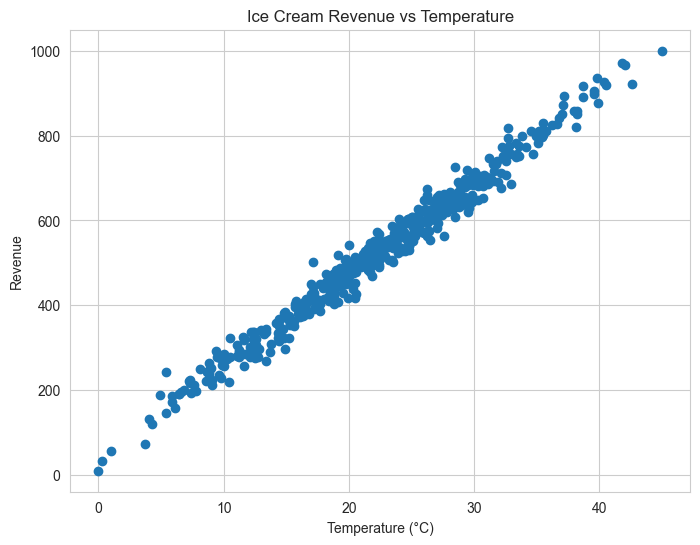

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df['Temperature'], df['Revenue'])
plt.title("Ice Cream Revenue vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Revenue")
plt.show()


**Insight (Scatter Plot):**  
This scatter plot shows a strong positive relationship between temperature and ice cream revenue. As temperature increases, revenue also increases. This indicates that warmer weather leads to higher ice cream sales.


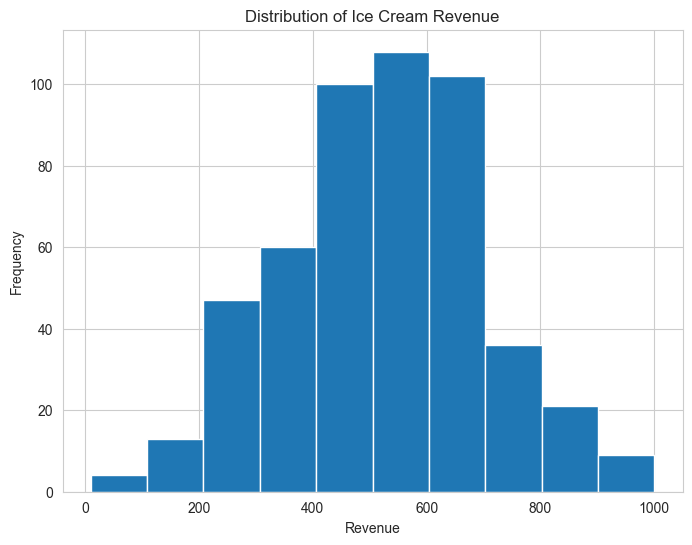

In [10]:
plt.figure(figsize=(8,6))
plt.hist(df['Revenue'], bins=10)
plt.title("Distribution of Ice Cream Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


**Insight (Histogram):**  
This histogram shows how frequently different revenue values occur. Most revenue values are concentrated in the middle range, which indicates consistent sales during moderate to high temperatures.


In [12]:
df.isnull().sum()


Temperature    0
Revenue        0
dtype: int64

In [13]:
df.head(10)


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
5,14.4,368
6,13.8,309
7,30.9,697
8,1.0,56
9,31.7,738


In [14]:
df_cleaned = df.copy()


In [15]:
df_cleaned.head(10)


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
5,14.4,368
6,13.8,309
7,30.9,697
8,1.0,56
9,31.7,738


**Missing Values Handling:**  
The dataset was checked for missing values using `isnull().sum()`. No missing values were found, so no replacement was required. A copy of the dataset was created for further preprocessing.


In [16]:
df.isnull().sum()


Temperature    0
Revenue        0
dtype: int64

In [17]:
df_cleaned = df.copy()


In [18]:
df.head(10)


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
5,14.4,368
6,13.8,309
7,30.9,697
8,1.0,56
9,31.7,738


In [19]:
df_cleaned.head(10)


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
5,14.4,368
6,13.8,309
7,30.9,697
8,1.0,56
9,31.7,738


**Missing Values Handling:**  
The dataset was checked for missing values using `isnull().sum()`. Both Temperature and Revenue columns contained no missing values. Therefore, no data imputation was required. A copy of the dataset was created for further preprocessing.


In [20]:
Q1 = df_cleaned['Revenue'].quantile(0.25)
Q3 = df_cleaned['Revenue'].quantile(0.75)

IQR = Q3 - Q1

Q1, Q3, IQR


(np.float64(406.0), np.float64(643.0), np.float64(237.0))

In [21]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(np.float64(50.5), np.float64(998.5))

In [22]:
outliers = df_cleaned[
    (df_cleaned['Revenue'] < lower_bound) |
    (df_cleaned['Revenue'] > upper_bound)
]

outliers


,Temperature,Revenue
371,0.3,33
402,0.0,10
444,45.0,1000


In [23]:
df_no_outliers = df_cleaned[
    (df_cleaned['Revenue'] >= lower_bound) &
    (df_cleaned['Revenue'] <= upper_bound)
]


In [24]:
df_no_outliers.head(10)


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
5,14.4,368
6,13.8,309
7,30.9,697
8,1.0,56
9,31.7,738


**Outlier Detection and Removal (IQR Method):**  
The Interquartile Range (IQR) method was used to detect outliers in the Revenue column. Values below the lower bound and above the upper bound were identified as outliers and removed to reduce their impact on analysis.


In [25]:
df_sampled = df_no_outliers.sample(frac=0.5, random_state=42)


In [26]:
df_no_outliers.shape


(497, 2)

In [27]:
df_sampled.shape


(248, 2)

In [28]:
df_reduced = df_sampled.drop(columns=['Temperature'])
df_reduced.head()


,Revenue
486,334
73,624
231,450
175,478
237,697


**Data Reduction:**  
Sampling was applied to reduce the dataset size by selecting 50% of the records randomly. Dimension elimination was also performed by dropping less relevant columns to reduce complexity and improve processing efficiency.


In [31]:
df_reduced = df_sampled.drop(columns=['Temperature'])

df_reduced.head()


,Revenue
486,334
73,624
231,450
175,478
237,697


In [33]:
%pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 36.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 44.7 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.2 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_sampled['Revenue_Scaled'] = scaler.fit_transform(
    df_sampled[['Revenue']]
)

df_sampled.head()


,Temperature,Revenue,Revenue_Scaled
486,12.4,334,0.303241
73,27.4,624,0.638889
231,20.2,450,0.437500
175,20.6,478,0.469907
237,30.0,697,0.723380


In [35]:
df_sampled['Revenue_Category'] = pd.cut(
    df_sampled['Revenue'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

df_sampled[['Revenue', 'Revenue_Category']].head(10)


,Revenue,Revenue_Category
486,334,Low
73,624,Medium
231,450,Medium
175,478,Medium
237,697,High
426,618,Medium
155,498,Medium
55,624,Medium
322,464,Medium
9,738,High


In [36]:
df_sampled[['Revenue']].head()


,Revenue
486,334
73,624
231,450
175,478
237,697


In [37]:
df_sampled[['Revenue', 'Revenue_Scaled', 'Revenue_Category']].head()


,Revenue,Revenue_Scaled,Revenue_Category
486,334,0.303241,Low
73,624,0.638889,Medium
231,450,0.437500,Medium
175,478,0.469907,Medium
237,697,0.723380,High


**Data Scaling and Discretization:**  
Min-Max scaling was applied to normalize the Revenue values between 0 and 1. This helps in comparing values on a common scale. Discretization was performed by grouping Revenue into Low, Medium, and High categories to simplify analysis and interpretation.


In [39]:
df_sampled.info()


<class 'pandas.DataFrame'>
Index: 248 entries, 486 to 198
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Temperature       248 non-null    float64 
 1   Revenue           248 non-null    int64   
 2   Revenue_Scaled    248 non-null    float64 
 3   Revenue_Category  248 non-null    category
dtypes: category(1), float64(2), int64(1)
memory usage: 8.1 KB


In [40]:
df_sampled.describe()


,Temperature,Revenue,Revenue_Scaled
count,248.000000,248.000000,248.000000
mean,22.637903,531.080645,0.531343
std,7.831966,167.589077,0.193969
min,3.700000,72.000000,0.000000
25%,17.600000,417.000000,0.399306
50%,23.100000,536.500000,0.537616
75%,27.800000,644.000000,0.662037
max,42.600000,936.000000,1.000000


In [41]:
min_rev = df_sampled['Revenue'].min()
max_rev = df_sampled['Revenue'].max()
mean_rev = df_sampled['Revenue'].mean()
median_rev = df_sampled['Revenue'].median()
mode_rev = df_sampled['Revenue'].mode()[0]

min_rev, max_rev, mean_rev, median_rev, mode_rev


(np.int64(72),
 np.int64(936),
 np.float64(531.0806451612904),
 np.float64(536.5),
 np.int64(604))

In [42]:
range_rev = max_rev - min_rev

Q1 = df_sampled['Revenue'].quantile(0.25)
Q3 = df_sampled['Revenue'].quantile(0.75)
IQR = Q3 - Q1

variance = df_sampled['Revenue'].var()
std_dev = df_sampled['Revenue'].std()

range_rev, Q1, Q3, IQR, variance, std_dev


(np.int64(864),
 np.float64(417.0),
 np.float64(644.0),
 np.float64(227.0),
 np.float64(28086.098733185318),
 np.float64(167.58907701036281))

In [43]:
df_sampled.corr(numeric_only=True)


,Temperature,Revenue,Revenue_Scaled
Temperature,1.000000,0.989209,0.989209
Revenue,0.989209,1.000000,1.000000
Revenue_Scaled,0.989209,1.000000,1.000000


**Statistical Analysis:**  
The dataset was analyzed using descriptive statistics and correlation analysis. Measures of central tendency and dispersion were calculated to understand the distribution of revenue values. Correlation analysis shows the relationship between temperature and revenue.


In [44]:
df_sampled.info()


<class 'pandas.DataFrame'>
Index: 248 entries, 486 to 198
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Temperature       248 non-null    float64 
 1   Revenue           248 non-null    int64   
 2   Revenue_Scaled    248 non-null    float64 
 3   Revenue_Category  248 non-null    category
dtypes: category(1), float64(2), int64(1)
memory usage: 8.1 KB


In [45]:
df_sampled.describe()


,Temperature,Revenue,Revenue_Scaled
count,248.000000,248.000000,248.000000
mean,22.637903,531.080645,0.531343
std,7.831966,167.589077,0.193969
min,3.700000,72.000000,0.000000
25%,17.600000,417.000000,0.399306
50%,23.100000,536.500000,0.537616
75%,27.800000,644.000000,0.662037
max,42.600000,936.000000,1.000000


In [46]:
min_rev = df_sampled['Revenue'].min()
max_rev = df_sampled['Revenue'].max()
mean_rev = df_sampled['Revenue'].mean()
median_rev = df_sampled['Revenue'].median()
mode_rev = df_sampled['Revenue'].mode()[0]

min_rev, max_rev, mean_rev, median_rev, mode_rev


(np.int64(72),
 np.int64(936),
 np.float64(531.0806451612904),
 np.float64(536.5),
 np.int64(604))

In [47]:
# Range
range_rev = max_rev - min_rev

# Quartiles and IQR
Q1 = df_sampled['Revenue'].quantile(0.25)
Q3 = df_sampled['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Variance and Standard Deviation
variance = df_sampled['Revenue'].var()
std_dev = df_sampled['Revenue'].std()

range_rev, Q1, Q3, IQR, variance, std_dev


(np.int64(864),
 np.float64(417.0),
 np.float64(644.0),
 np.float64(227.0),
 np.float64(28086.098733185318),
 np.float64(167.58907701036281))

In [48]:
df_sampled.corr(numeric_only=True)


,Temperature,Revenue,Revenue_Scaled
Temperature,1.000000,0.989209,0.989209
Revenue,0.989209,1.000000,1.000000
Revenue_Scaled,0.989209,1.000000,1.000000


**Statistical Analysis:**  
The dataset was analyzed using descriptive statistics and correlation analysis. The average revenue was approximately 531, with values ranging from 72 to 936. The standard deviation of about 168 indicates moderate variation in revenue. Correlation analysis shows a very strong positive relationship (0.989) between temperature and revenue, confirming that higher temperatures lead to increased ice cream sales.
